# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
import os.path
from pandas.util.testing import assert_frame_equal
import csv

# used for handling dates
import datetime
from datetime import datetime, date,timedelta

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Set formattign options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

C:\Users\marma\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


# Request ticker name from user and generate list of trading days

In [2]:
userTicker = input("Enter ticker name from list: ")
#['MRNA','AXSM','SAGE','GILD']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
print("You typed: ",userTicker)

Enter ticker name from list: MRNA
You typed:  MRNA


In [3]:
#Request the closing day name from user
daynameTemp = str(input("Ente the day name for market close ex :"))

Ente the day name for market close ex :Monday


In [4]:
# Function to select trading day and return date in correct date format 
def get_previous_byday(dayname, start_date=None):
    if start_date is None:
        start_date = datetime.today()
        day_num = start_date.weekday()
        day_num_target = weekdays.index(dayname)
        days_ago = (7 + day_num - day_num_target) % 7
    if days_ago ==0 and start_date.hour >= 13:
        return start_date
    if days_ago == 0:
        days_ago = 7
    target_date = start_date - timedelta(days=days_ago)
    return target_date

In [5]:
#Display the target close date to user
print("This is the target date:", get_previous_byday(daynameTemp))
dateText = get_previous_byday(daynameTemp)

This is the target date: 2020-05-18 08:59:25.325280


In [6]:
#Create Year, Month, Day date variable
myYear = str(dateText.year)
myMonth = str(dateText.month)
myDay = str(dateText.day)

# Input stock ticker names from a csv file

In [7]:
#CSV file is read from current working directory
#Import os to use abs file path
import os

#user current dir
cwd = os.getcwd()

new_u_file = 'textfile_pharma.csv'

#complete path file
abs_file_path = os.path.join(cwd,new_u_file)

if os.path.isfile(abs_file_path):
    print("File found")
try:
    fhand = open(abs_file_path, 'r')
except:
    print('File cannot be opened:', new_u_file)
    #exit()

tmptickers = list()
for line in fhand:
    line = line.rstrip()
    if len(line) == 0 : continue
    tmptickers.append(line)

File found


In [8]:
tmptickers

['AXSM',
 'SAGE',
 'GILD',
 'INO',
 'ALT',
 'IMAB',
 'RHHBY',
 'MRNA',
 'IPIX',
 'CYDY',
 'MATN',
 'NVAX',
 'JNJ',
 'GSK',
 'PTH',
 'DWAS',
 'LN',
 'GR',
 'PFE']

# Obtaining and organizing stock data from Yahoo Finance using pandas datareader

In [9]:
# import data reader package
import pandas_datareader as pdr

#def get(tickers, startdate, enddate):
#    def data(ticker):
#        return(pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
#    datas=map(data,tickers)
#    return(pd.concat(datas,keys=tickers,names=['Ticker','Date']))
#all_data=get(tickers, datetime(2020,4,7), datetime(int(myYear),int(myMonth),int(myDay)))

# Set the start and end date for historical data
# Start = 2019, 5, 11

In [10]:
# request the three years of data for SAGE
start = datetime(2019, 5, 11)
end = datetime(int(myYear),int(myMonth),int(myDay))
#get_stock_data(userTicker, start, end)[:5]
#userPDTicker = get_stock_data(userTicker, start, end)
#print(end)

In [11]:
userPDTicker=pdr.get_data_yahoo(userTicker, start, end)

In [12]:
userPDTicker.describe()

High         Low        Open       Close  \
count  257.000000  257.000000  257.000000  257.000000   
mean    23.084872   21.378825   22.312782   22.234903   
std     12.047226   10.611504   11.420341   11.443973   
min     12.690000   11.540000   12.260000   12.260000   
25%     15.750000   14.890000   15.470000   15.420000   
50%     19.240000   18.500000   18.959999   18.780001   
75%     23.500000   21.850000   22.850000   22.700001   
max     87.000000   75.660004   86.139999   80.000000   

             Volume   Adj Close  
count  2.570000e+02  257.000000  
mean   6.658530e+06   22.234903  
std    1.160001e+07   11.443973  
min    3.613000e+05   12.260000  
25%    1.167300e+06   15.420000  
50%    1.929700e+06   18.780001  
75%    6.188300e+06   22.700001  
max    8.081330e+07   80.000000

In [13]:
#userTicker['Pct_Chg']=userTicker.Change/userTicker.Open

In [14]:
# create a time-series chart with a title and specific 
# x and y axis labels

# title is set in the .plot() method as a parameter
#userTicker['Pct_Chg'].plot(title='Percent Change', grid=True)
# explicitly set the x and y axes labels after the .plot()
#plt.xlabel('Time')
#plt.ylabel('Percent Change');

# CSV file write and read for Statistical Modeling function from Victor

In [15]:
#Hard coded file name to use for csv output file
myFile = "C:\\Users\\marma\\Documents\\investments\\csv\\"+userTicker+"_"+myMonth+"_"+myDay+".csv"

In [16]:
print(myFile)

C:\Users\marma\Documents\investments\csv\MRNA_5_18.csv


In [17]:
userPDTicker.to_csv(myFile)

In [18]:
#Read back csv file data by column index
x = pd.read_csv(myFile,usecols=['Low'])
y = pd.read_csv(myFile,usecols=['High'])


#print(x)
#print(x['Date'])
LarrX = []
HarrY = []
x1 = x.values
y1 = y.values


xx2 = []
yy3 = []

for n in x1:
    for m in n:
        xx2.append(m)
for t in y1:
    for m in t:
        yy3.append(m)

#for k,v in x.values():
    #print(type(v))
    #LarrX.append(v)
    #for items in v:
        #print(items)
#for k,v in y.items():
   #HarrY.append(v)
#print(len(LarrX))
#print(len(HarrY))

#for items in LarrX:
   # print(items)
#xx = [1,5,6,7,8]
#$yy = [1,6,7,8,9]

#print(xx2)

# Configure sklearn for application of Statistical Modeling

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [20]:
#takes a dateframe and returns two arrays, index_setting = 0 means two columns from df. 1 means index + column
#warning, you need a index and a single column for 1, or only two colums(index ok) for 0 or code will not work
def dataframe_to_array(df, index_setting):
    #if data is in a colum and an index
    if index_setting == 1:
        #get the index from the dataframe
        x1 = df.index.values
        #get the values from the dataframe, gives and array of arrays
        y1 = df.values
        y2 = list()
        #transfrom the array of arrays into a single array
        for n in y1:
            for m in n:
                y2.append(m)
        y2 = np.array(y2)
        #return
        return x1, y2
    #if data in is two columns
    else:
        #turn dataframe into and array of arrays
        set_array = df.to_numpy()
        #splits array into two arrays of a single array
        bisector = np.array_split(set_array, 2)
        count = 0
        #define x1 and y1
        for n in bisector:
            if count == 0:
                x1 = n
                count += 1
            else:
                y1 = n
        #reverts back array of array into a just an array
        for n2 in x1:
            x1 = n2
        for n3 in y1:
            y1 = n3
        #return
        return x1, y15, 15, 25, 35, 45, 55


In [21]:
#turns a csv file into a dataframe
#warning, not tested if it works
def csv_into_dataframe(myFile):
    df = pd.read_csv(myFile)
    return df

#builds a fuction that returns a predicted y, x1 and y1 are arrays, power refers to highest polynomial degree in model
#Note: this function is outdated now
def predict_dependent(x1, y1, power):
    #build a sorted array for ploting later
    x2 = x1
    np.sort(x2)
    #reshape the x1 and x2 arrays to work for linear regression fitting
    x1 = x1.reshape((-1,1))
    x2 = x2.reshape((-1,1))
    #determine a model type
    if power > 1 and power % 1 == 0:
        #rebulid again to work with polynomial modeling
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        x2_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x2)
        #build predictive array
        prediction = model.predict(x2_)
    #linear is default
    else:
        #bulids a model using two arrays
        model = LinearRegression().fit(x1,y1)
        prediction = model.predict(x2)
    #return, note that both x2 and prediction are in order
    return prediction

In [22]:
#take in a set and return a set with the sorted x and new predicted y, power refers to highest polynomial degree in model
#Note: this function is outdated now
def regression_transform(x1, y1, power):
    #build a model
    x2 = x1
    np.sort(x2)
    x3 = x2
    x1 = x1.reshape((-1,1))
    x2 = x2.reshape((-1,1))
    #x3 is to have a x2_ that is not modified for polynomial features for indexing
    #this next part is slimilar to predict_dependent()
    if power > 1 and power % 1 == 0:
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        x2_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x2)
        y2 = model.predict(x2_)
    else:
        model = LinearRegression().fit(x1,y1)
        y2 = model.predict(x2)
    data = y2
    #bulid a dataframe with y2 as data and x3 as an index
    set_rebuild = pd.DataFrame(data, index = x3)
    #returns the dataset
    return set_rebuild 

In [23]:
#scores how well the model fits that data with a R^2 score, with is from 0 to 1
def prediction_score(x1, y1, power):
    #slimilar structure as above, but no need to organize
    x1 = x1.reshape((-1,1))
    if power > 1 and power % 1 == 0:
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        #model.score returns a R^2 value, which rates fit from 0 to 1
        score = model.score(x1_, y1)
    else:
        model = LinearRegression().fit(x1,y1)
        score = model.score(x1, y1)
    #return
    return score

In [24]:
#this is the primary function every is built up to, first three are same as above, next three build prediction range
def ranged_regress_transform(x1, y1, power, value_min, value_max, step):
    count = value_min
    x2 = list()
    #create list that starts at min, ends a max, step effects how many calculations are done
    while count <= value_max:
        x2.append(count)
        count += step
    #change the list into an array
    x3 = np.array(x2)
    x3 = x3.reshape((-1,1))
    x1 = x1.reshape((-1,1))
    #also slimilar to above code
    if power > 1 and power % 1 == 0:
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        x3_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x3)
        y2 = model.predict(x3_)
    else:
        model = LinearRegression().fit(x1,y1)
        y2 = model.predict(x3)
    data = y2
    #build the dataframe with good graphing data
    new_build = pd.DataFrame(data, index = x2)
    #return the dataframe
    return new_build

In [25]:
def ranged_df_regress_trans(df, index_setting, power, value_min, value_max, step):
    x1, y1 = dataframe_to_array(df, index_setting)
    final_build = ranged_regress_transform(x1, y1, power, value_min, value_max, step)
    return final_build

In [26]:
#same as above with with scoring
def df_regress_scoring(df, index_setting, power):
    x1, y1 = dataframe_to_array(df, index_setting)
    score = prediction_score(x1, y1, power)
    return score

In [27]:

#Note: these were testing function left for archiving
#def test():
#    x = np.array([5, 15, 25, 35, 45, 55])
#    y = np.array([5, 20, 14, 32, 22, 38])
#    return x, y

#def arrary_test():
#    x = np.array([5, 15, 25, 35, 45, 55])
#    y = np.array([5, 20, 14, 32, 22, 38])
#    data = y
#    df = pd.DataFrame(data, index = x)
#    x1 = df.index.values
#    y1 = df.values
#    y2 = list()
#    for n in y1:
#        for m in n:
#            y2.append(m)
#    y2 = np.array(y2)
#    return x1, y2


# Plots for regress, df_regress, transform

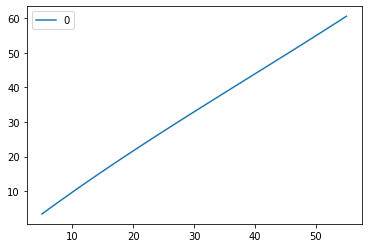

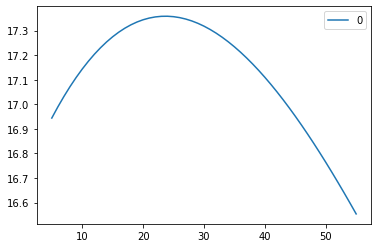

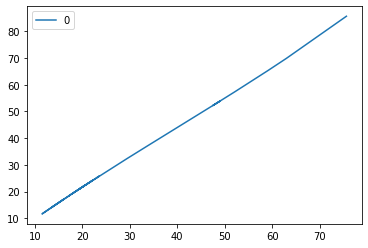

In [28]:
#uses all of the above code, takes a dataframe and returns a dataframe with predicted values
g = np.array(xx2)
f = np.array(yy3)
#a = np.array([1,2,3,4,5,6])
#b = np.array([3,5,9,14,21,34])
run = ranged_regress_transform(g, f, 3, 5, 55, 1)
run2 = ranged_df_regress_trans(x,1,3,5,55,1)
run3 = regression_transform(g,f,3)
run.plot()
run2.plot()
run3.plot()

# Data Plots for stock names in this list: ['MRNA','AXSM','SAGE','GILD']

In [29]:
# read data from Yahoo! Finance for a specific 
# stock specified by ticker and between the start and end dates
def get_stock_data(ticker, start, end):
#    # read the data
    data = pdr.get_data_yahoo(ticker, start, end)
    # rename this column
    data.insert(0, "Ticker", ticker)
    return data

In [30]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
def get_data_for_multiple_stocks(tickers, start, end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker, start, end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [31]:
print(end)

2020-05-18 00:00:00


In [32]:
# get the data for all the stocks that we want
#print(tickers)
#raw = get_data_for_multiple_stocks(tmptickers, start, end)
#raw = get_data_for_multiple_stocks(['AXSM','SAGE','GILD','INO','TLT','ALT','IMAB','RHHBY','MRNA','IPIX','CYDY','MATN','NVAX','JNJ','GSK','PTH','DWAS','LN','GR','PFE'], start, end)
raw = get_data_for_multiple_stocks(['MRNA','AXSM','SAGE','GILD'], start, end)

In [33]:
# take a peek at the data for userTicker
raw[userTicker][:5]
#raw

Ticker       High        Low       Open  \
Date                                                 
2019-05-13   MRNA  24.770000  23.225000  24.459999   
2019-05-14   MRNA  24.889999  23.570000  24.500000   
2019-05-15   MRNA  23.840000  22.809999  23.459999   
2019-05-16   MRNA  24.049999  23.150000  23.500000   
2019-05-17   MRNA  23.429001  21.680000  23.309999   

                Close   Volume  Adj Close  
Date                                       
2019-05-13  24.430000   491600  24.430000  
2019-05-14  23.590000   473900  23.590000  
2019-05-15  23.120001   847300  23.120001  
2019-05-16  23.459999   536600  23.459999  
2019-05-17  23.080000  1275200  23.080000

In [34]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

In [35]:
# do the pivot
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

Ticker       AXSM       GILD       MRNA        SAGE
Date                                               
2019-05-13  21.67  64.169998  24.430000  163.949997
2019-05-14  21.74  65.080002  23.590000  166.089996
2019-05-15  23.00  65.300003  23.120001  167.050003
2019-05-16  23.40  65.779999  23.459999  170.320007
2019-05-17  23.08  66.360001  23.080000  167.970001

# Plotting time-series prices

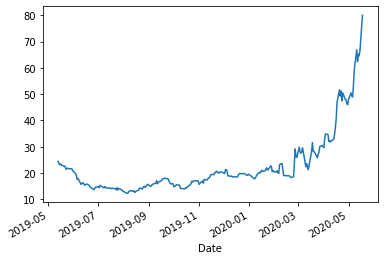

In [36]:
# plot the closing prices of userTicker
close_px[userTicker].plot();

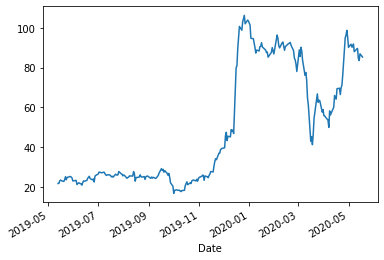

In [37]:
# plot the closing prices of AXSM
close_px['AXSM'].plot();

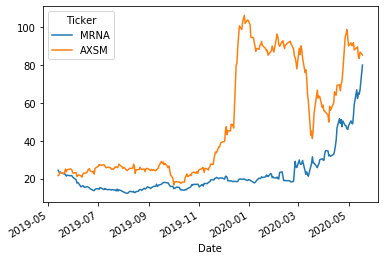

In [38]:
# plot userTicker vs AXSM on the same chart
close_px[[userTicker, 'AXSM']].plot();

# Plotting

In [39]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker           AXSM        GILD        MRNA       SAGE
Date                                                    
2020-05-12  1025200.0  12140800.0  25934500.0   841200.0
2020-05-13   830500.0  11166300.0  22126000.0  1232600.0
2020-05-14   552900.0  10711900.0  12198200.0  1036300.0
2020-05-15   626000.0  12350800.0  16341900.0  1583700.0
2020-05-18   973500.0  16586800.0  80813300.0  1644400.0

In [40]:
#Open close change
#raw['Change']=raw.Open - raw.Close

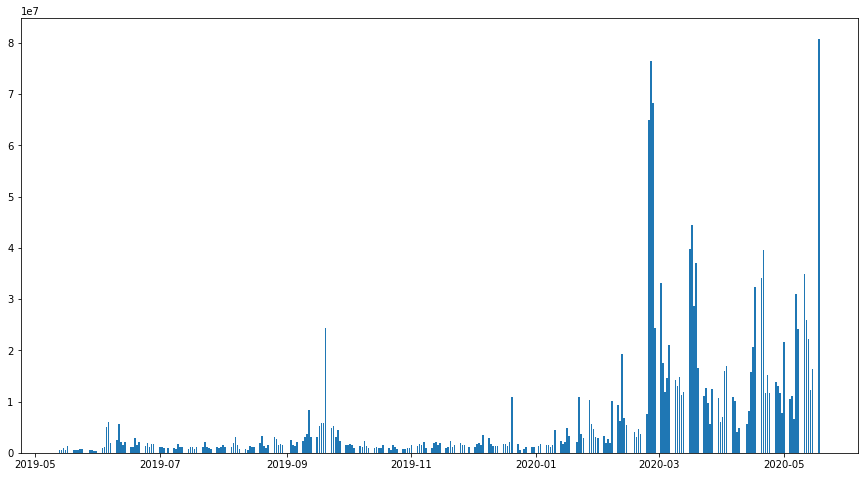

In [41]:
# plot the volume for userTicker
userTicker_volume = volumes[[userTicker]]
plt.bar(userTicker_volume.index, userTicker_volume[userTicker])
plt.gcf().set_size_inches(15,8)

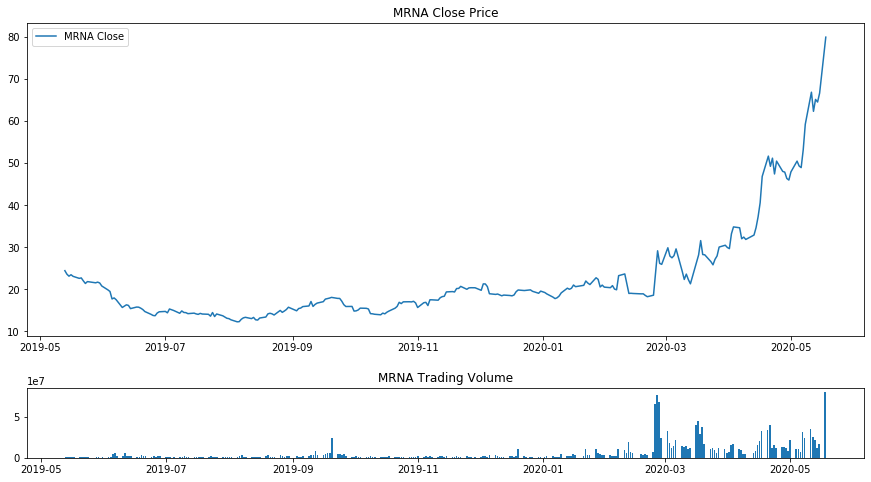

In [42]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px[userTicker].index, close_px[userTicker], 
         label= userTicker+' Close')
plt.title(userTicker+' Close Price')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(userTicker_volume.index, userTicker_volume[userTicker])
plt.title(userTicker+' Trading Volume')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Calculating simple daily percentage change

In [43]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker          AXSM      GILD      MRNA      SAGE
Date                                              
2019-05-13       NaN       NaN       NaN       NaN
2019-05-14  0.003230  0.014181 -0.034384  0.013053
2019-05-15  0.057958  0.003380 -0.019924  0.005780
2019-05-16  0.017391  0.007351  0.014706  0.019575
2019-05-17 -0.013675  0.008817 -0.016198 -0.013798

In [44]:
# check the percentage on 2020-05-12
close_px.loc[end][userTicker] / \
close_px.loc[end][userTicker] -1

0.0

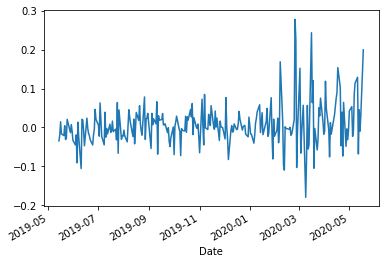

In [45]:
# plot daily percentage change for INO
daily_pc[userTicker].plot();

# Calculating simple daily cumulative returns

In [46]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker          AXSM      GILD      MRNA      SAGE
Date                                              
2019-05-13       NaN       NaN       NaN       NaN
2019-05-14  1.003230  1.014181  0.965616  1.013053
2019-05-15  1.061375  1.017610  0.946377  1.018908
2019-05-16  1.079834  1.025090  0.960295  1.038853
2019-05-17  1.065067  1.034128  0.944740  1.024520

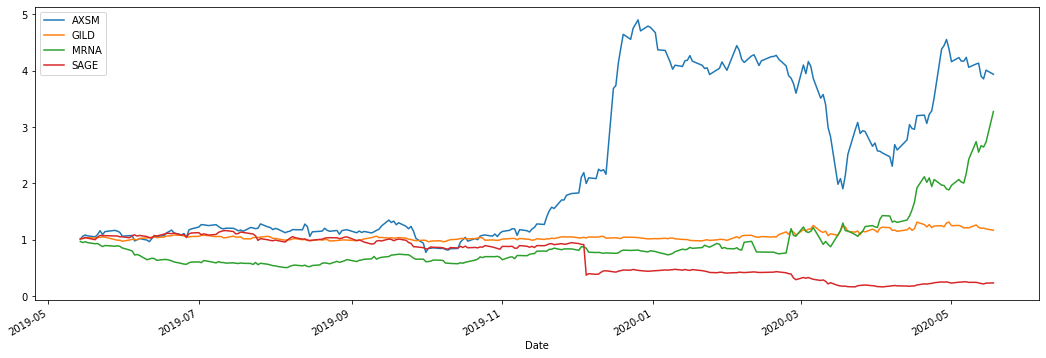

In [47]:
# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(18,6))
plt.legend(loc=2);

# Resampling data from daily to monthly returns

In [48]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker           AXSM       GILD       MRNA        SAGE
Date                                                   
2019-05-31  22.959999  62.250000  20.780001  171.869995
2019-06-30  22.959999  62.250000  20.780001  171.869995
2019-07-31  25.500000  65.519997  13.100000  160.339996
2019-08-31  25.500000  65.519997  13.100000  160.339996
2019-09-30  20.240000  63.380001  15.920000  140.289993

In [49]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker          AXSM      GILD      MRNA      SAGE
Date                                              
2019-05-31       NaN       NaN       NaN       NaN
2019-06-30  0.000000  0.000000  0.000000  0.000000
2019-07-31  0.110627  0.052530 -0.369586 -0.067086
2019-08-31  0.000000  0.000000  0.000000  0.000000
2019-09-30 -0.206275 -0.032662  0.215267 -0.125047

In [50]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker          AXSM      GILD      MRNA      SAGE
Date                                              
2019-05-31       NaN       NaN       NaN       NaN
2019-06-30  1.000000  1.000000  1.000000  1.000000
2019-07-31  1.110627  1.052530  0.630414  0.932914
2019-08-31  1.110627  1.052530  0.630414  0.932914
2019-09-30  0.881533  1.018153  0.766121  0.816256

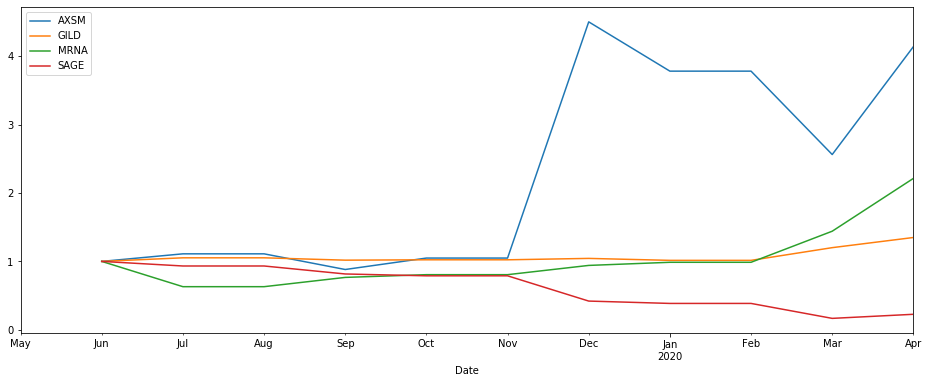

In [51]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(16,6))
plt.legend(loc=2);

# Analyzing distribution of returns

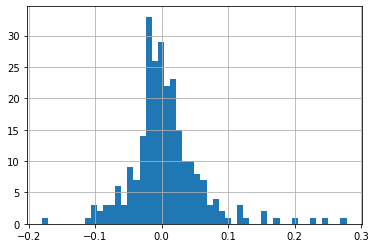

In [52]:
# histogram of the daily percentage change for AXSM
axsm = daily_pc[userTicker]
axsm.hist(bins=50);

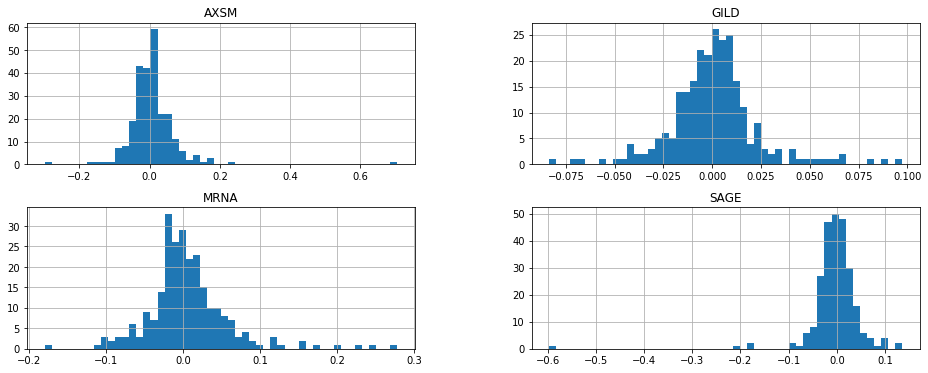

In [53]:
# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(16,6));

# Performing moving average calculation

Close  30_MA_Close  90_MA_Close
Date                                           
2019-05-13  24.430000          NaN          NaN
2019-05-14  23.590000          NaN          NaN
2019-05-15  23.120001          NaN          NaN
2019-05-16  23.459999          NaN          NaN
2019-05-17  23.080000          NaN          NaN
...               ...          ...          ...
2020-05-12  62.349998    44.255000    30.054167
2020-05-13  65.180000    45.429333    30.568500
2020-05-14  64.559998    46.592333    31.084389
2020-05-15  66.690002    47.708666    31.627833
2020-05-18  80.000000    49.214000    32.316944

[257 rows x 3 columns]

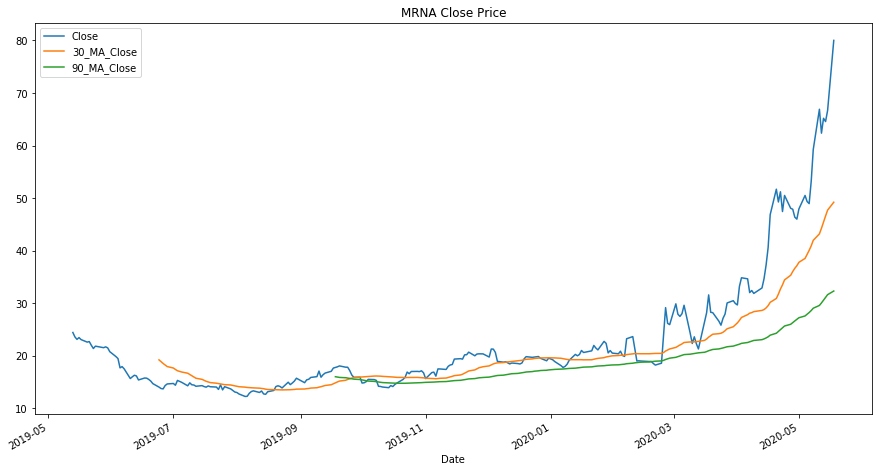

In [54]:
# extract just MRNA close
mrna_close = close_px[[userTicker]][userTicker]
# calculate the 30 and 90 day rolling means
ma_30 = mrna_close.rolling(window=30).mean()
ma_90 = mrna_close.rolling(window=90).mean()
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': mrna_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title= userTicker+" Close Price")
plt.gcf().set_size_inches(15,8)
result

# Comparision of average daily returns across stocks

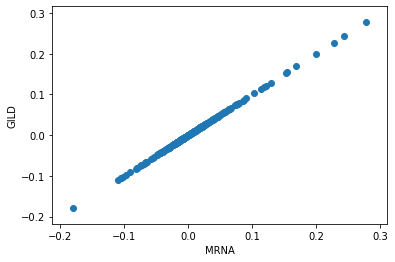

In [55]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc[userTicker], daily_pc[userTicker])
plt.xlabel(userTicker)
plt.ylabel('GILD');

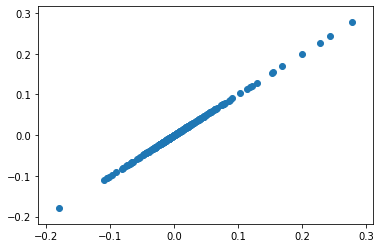

In [56]:
# demonstrate perfect correlation
plt.scatter(daily_pc[userTicker], daily_pc[userTicker]);

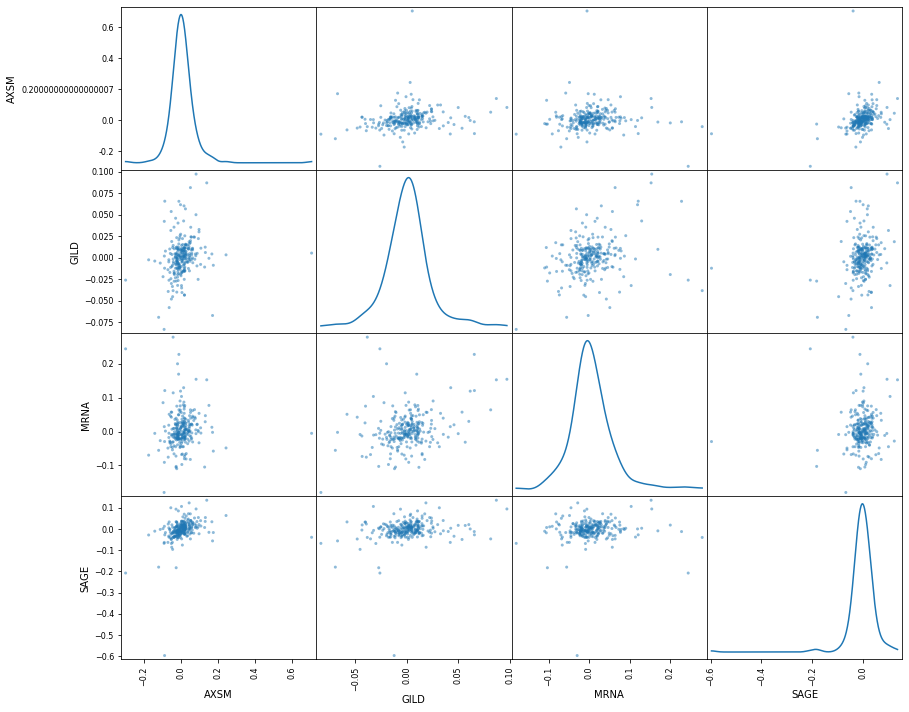

In [57]:
#from pandas.plotting import scatter_matrix
from pandas.plotting._misc import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(14,12));

# Correlation of stocks based upon daily percentage change of closing price

In [58]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker      AXSM      GILD      MRNA      SAGE
Ticker                                        
AXSM    1.000000  0.195555  0.001565  0.296385
GILD    0.195555  1.000000  0.288454  0.237989
MRNA    0.001565  0.288454  1.000000  0.066642
SAGE    0.296385  0.237989  0.066642  1.000000

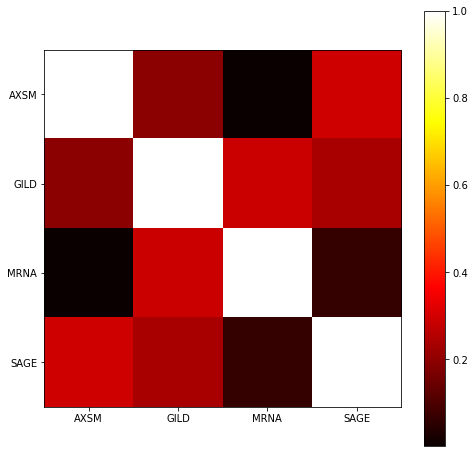

In [59]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Volatility

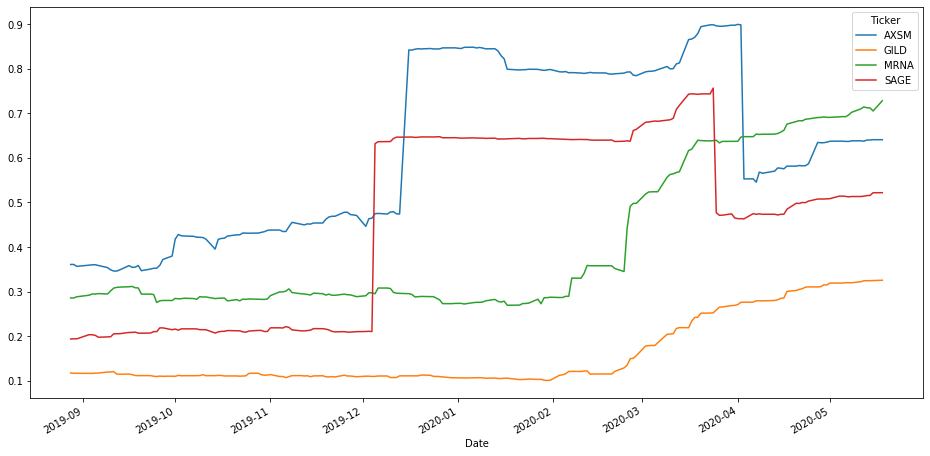

In [60]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot  
vol.plot(figsize=(16, 8));

# Determining risk relative to expected returns

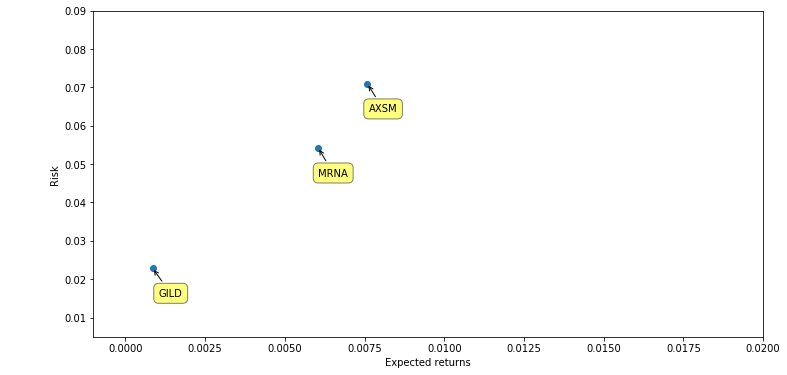

In [61]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.02)
plt.ylim(0.005, 0.09)

# set size
plt.gcf().set_size_inches(12,6)